## Iteratively Reweigthed Least Squares (IRLS)

This notebook covers section 3.4 of the notes on IRLS. It is noit covered in the GLM videos, but has a substantial presence in the notes and is in a past exam paper.

Lecture 10 Part 2 covers it.

The general method is:

1. Provide an inital guess ($b_0$) of the parameters $\beta$
2. Create a $W$ weight matrix based on the current parameters
3. Sepcify a z that depends on current paramater estimates and the response values
4. Using the previous values of $\beta, (b_{(m-1)}$ calculate $b_{(m)}$ by $(X^TWX)^-1X^TWz$ where $W,z$ are from $b_{(m-1)}$
5. Repeat until a convergence criteria is met

There are two important equations:

$w_{ii} = \frac{1}{Var(Y_i)}(\frac{\partial \mu_i}{\partial \eta_i})^2$

and 

$z_i = \eta_i +(y_i - \mu_i)(\frac{\partial \eta_i}{\partial \mu_i})$

This worked example applies to the beetles data from the course. Using the logit link we should get:

- $\beta_0 = -60.717$
- $\beta_1 = 34.270$


In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
betas = np.array([-60,35])[:,None]

beet_conc = np.array([1.6907, 1.7242, 1.7552, 1.7842, 1.8113, 1.8369, 1.8610, 1.8839])
beet_no = np.array([59, 60, 62, 56, 63, 59, 62, 60])
beet_dead = np.array([6,13,18,28,52,53,61,60])
beet_prop = beet_dead/beet_no

dims = np.shape(beet_conc)[0]

np.ones((dims,1))

X = np.hstack([np.ones((np.shape(beet_conc)[0],1)), beet_conc[:,None]])

Recalling for the logit:

$\mu_i = \frac{e^{\eta_i}}{e^{\eta_i}+1}$

Therefore the derivative by quotient rule is 

$\frac{\partial \mu_i}{\partial \eta_i} = \frac{\exp(\eta_i)}{(1+ \exp(\eta_i))^2}$

As:

$Var(Y_i) = \frac{\mu_i(1-\mu_i)}{n_i}$

And swapping $\mu$ for $\frac{e^{\eta_i}}{e^{\eta_i}+1}$

$Var(Y_i) = \frac{e^{\eta_i}}{n_i(e^{\eta_i}+1)^2}$

Therefore $w_{ii}=\frac{1}{Var(Y_i)}(\frac{\partial \mu_i}{\partial \eta_i})^2$ 

Which can be shown to equal:

$w_{ii}=\frac{n_i\exp(\eta_i)}{(1+ \exp(\eta_i))^2}$

In [82]:
def calc_w(X, betas, n):
    
    eta = X @ betas
    
    eta = eta.flatten()
    
    diag = (n*np.exp(eta))/(1+np.exp(eta))**2 

    zeros = np.zeros((dims,dims))
    
    np.fill_diagonal(zeros,diag)
    
    return zeros

We know that:

$\eta_i = log(\frac{\mu_i}{1-\mu_i})$

By chain (and therefore quotient rule)

$\frac{\partial \eta_i}{\partial \mu_i} = \frac{1}{\mu_i(1-\mu_i)}$

therefore:

$z_i = \eta_i + \frac{y-\mu_i}{\mu_i(1-\mu_i)}$

In [85]:



def z_calc(eta, y, mu):
    
    return eta + (y - mu)/(mu*(1-mu))

b_0 = [0]
betas = np.array([0,0])[:,None]
for i in range(10):
    eta = (X @ betas).flatten()
    mu = np.exp(eta)/(1+np.exp(eta))

    z = z_calc(eta, beet_prop, mu)
    w = calc_w(X, betas, beet_no)

    betas = np.linalg.inv(X.T @ w @ X)@X.T@w@z
    
    b_0 = b_0 + [betas[0]]
    
    
# np.linalg.inv(X.T @ w @ X) is the covariance matrix and contains SE

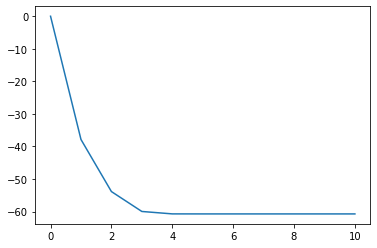

In [84]:
plt.plot(b_0)